# TP5 : comparison between classifiers
The purpose of this lab session is to have a look at a wide set of classifiers to compare them on specific classification tasks.

First, we will use a classical example provided by scikit-learn for a first insight into such a comparison. Then, you will compare all these methods applied to the ZipCode dataset and try to optimize your performances. Enjoy !

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


# Step 1 : classifier comparison


A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.



Automatically created module for IPython interactive environment


C:\Users\Juliette\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Juliette\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Juliette\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


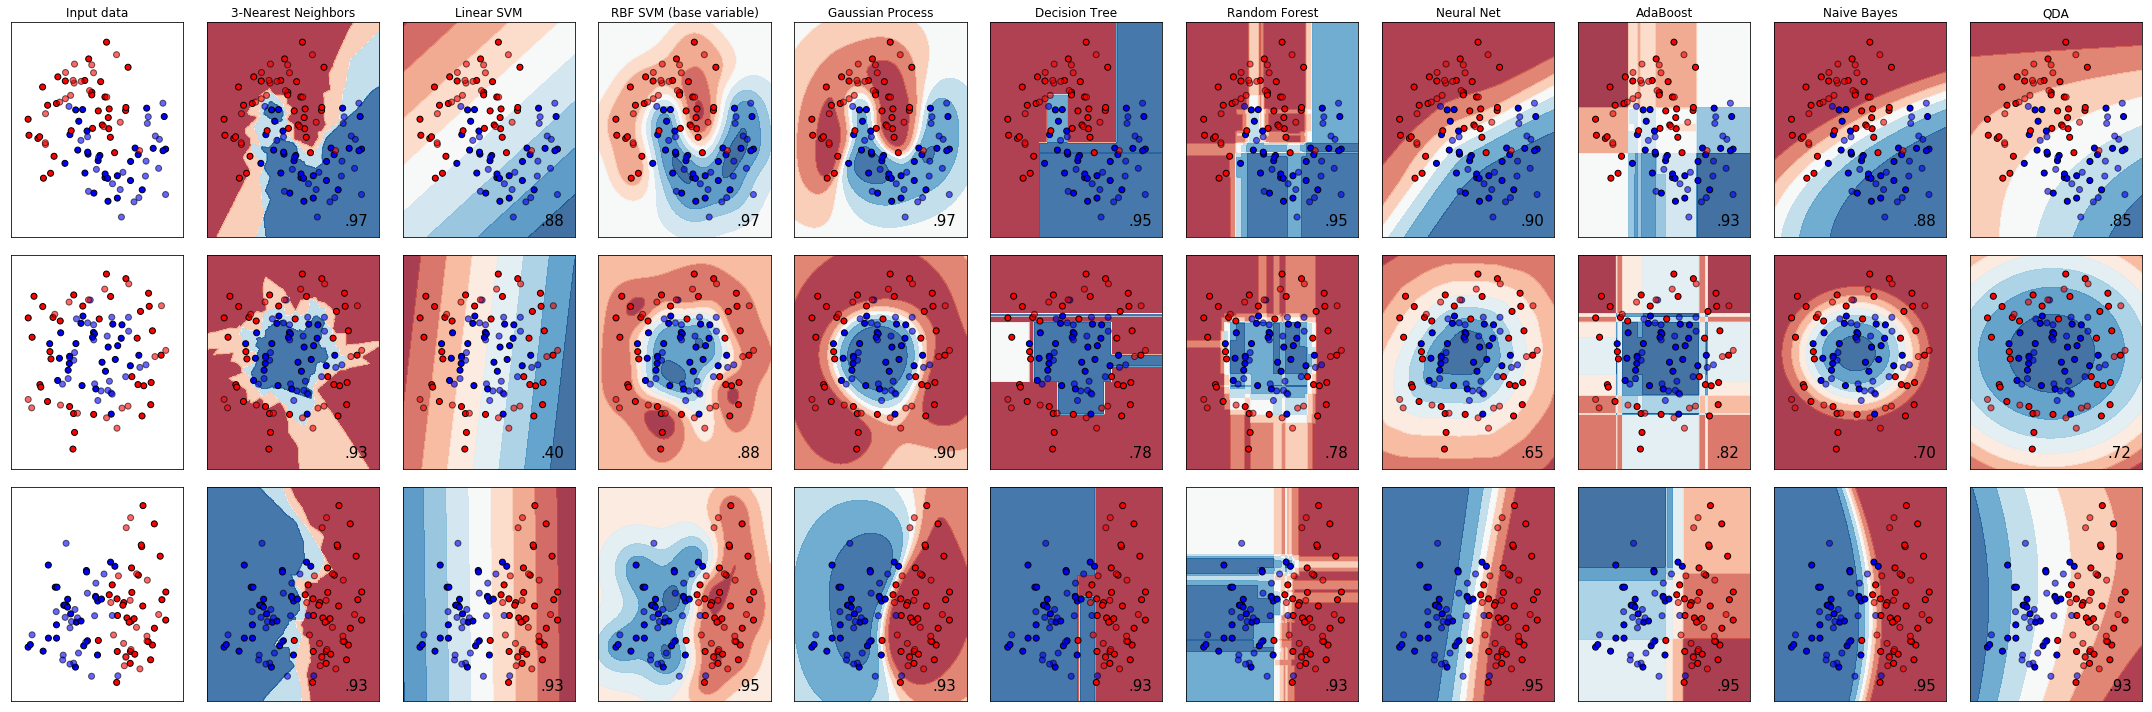

In [2]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["3-Nearest Neighbors", "Linear SVM", "RBF SVM (base variable)", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1), 
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# Crée artificiellement un problème de classification à deux classes linéairement séparables
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape) # bruitage des données
linearly_separable = (X, y)

# 3 datasets de natures différentes : arcs de cerlces, cercles concentriques, données linéairement séparables
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(30, 10))
i = 1

bilan = np.zeros(33)

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds  # X est l'ensemble des points, y leur classification réelle
    X = StandardScaler().fit_transform(X)
    
     # création des train et test sets aléatoirement, 40% des points sont dans le test set
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42) 
        
    # créer un meshgrid adapté aux données, de pas h
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i) # ax est un objet qui désigne la figure courante
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k') # points de test en transparence
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train) # entraine le classifieur clf sur le train set
        score = clf.score(X_test, y_test)   # calcule la précision du classifieur clf évalué sur le test set 
                                            # (% de bonne classification)
        
        bilan[i-1] = score
        
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"): # cas où la prédiction est discrète (ex : arbre de décision)
            # hasattr() retourne un booléen true si le classifieur clf a une méthode decision_function()
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) 
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8) # affiche les régions de décision

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right') 
                # ('Erreur = %.2f' % score) permet d'insérer une variable dans un string (%d entier, %s str, %f float)
        i += 1

plt.tight_layout()
plt.show()

## Exercise 1: taking benefit from this overview
1. Have a look at the code above and consider how it works. In particular, comment on the use of object oriented programming in Python.
2. Check which methods you already know and which one you don't. For those methods you don't know, write a few lines explaining their principle (as far as you can for now from your own researches).
3. Which method seems to perform the best for each dataset ? Could you explain the results ?

#### Q1
Dans l'algorithme ci-dessus, le paradigme orienté objet a 2 applications : les classifieurs *clf* et les sous-figures *ax*. Ces objets possèdent des méthodes qu'on souhaite uiliser dans ce cas d'étude. En ce qui concerne le classifieur, les méthodes communes portent le même nom mais ont un comportement différent (*clf.fit()* par exemple) ; selon sa nature, certaines méthodes supplémentaires sont accessibles (*clf.decision_function()* par exemple).

#### Q2
- Gaussian Process Classifier : cet algorithme est similaire au RBF SVM dans le sens où il fait intervenir un noyau gaussien. Il optimise la log-vraisemblance ainsi que les hyperparamètres du noyau (en particulier $\gamma$).
- MLPClassifier : Algorithme de réseau de neuronnes à plusieurs couches et une largeur de 100 perceptrons de type "relu" par défaut. Le paramètre *alpha* indiqué correspond au paramètre de régularisation de ridge regression.
- Adaboost : Cet algorithme vu en cours utilise ici par défaut un arbre de décision binaire.
Les autres algorithmes ont été vus en cours.

#### Q3
- **dataset 3 (linéairement séparable au bruit près)** : Tous les algorithmes ont des performances similaires à 2% près. Si la complexité de l'algorithme est un enjeu à prendre en compte, le SVM linéaire suffit à classifier ce type de données de façon assez fiable (93% contre 95% pour les meilleurs algorithmes). Cependant, le SVM linéaire a de mauvaises performances sur tout autre type de données ...
- **dataset 1 (demi-cercles imbriqués)** : Les algorithmes les plus performants sont le 3-NN, RBF-SVM et Processus Gaussien. Nous verrons que les mêmes algorithmes se démarquent dans l'exemple suivant. Par construction, ce dataset est à l'intermédiaire entre le dataset 3 quasiemment linéairement séparable et le dataset 2 qui présente des données imbriquées.
- **dataset 2 (cercles concentriques)** : tous les algorithmes ont de moins bonnes performances que pour le dataset 1. Le meilleur classifieur ici est le 3-NN, cependant si on avait moins de données sur le cercle extérieur la performance en serait drastiquement altérée. Les algorithmes qui ont les moins bonnes performances sont globalement ceux qui produisent des frontières de décision soit droites, soit colinéaires avec les vecteurs de base du repère : SVM linéaire, Decision Tree et donc Random Forest et AdaBoost. Les algorithmes qui utilisent des noyaux gaussiens nous paraissent donc les plus adaptés pour ce type de données, avec des précisions de 88% (RBF-SVM) et 90% (Processus Gaussien).

# Step 2: choosing a classifier for a special dataset

## Exercise 2: zipCode digits
Consider the digits in the zipCode dataset (see below how to get it from scikit-learn) and consider any classification problem of your choice to compare the performances of a set of approaches (supervised or unsupervised).

You may consider binary classification, multiclass classification, clustering... Enjoy & compare your results with your classmates!


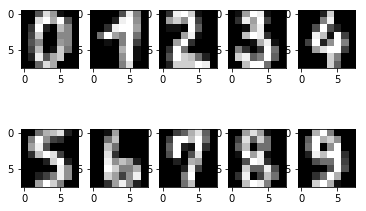

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
K = 10

# 0=1, 131 = 1, 371=2, 950=3, 100=4, 373=5, 672=6, 480=7, 933=8, 220=9, 
subsample = digits.images[[0, 131, 371, 950, 100, 373, 672, 480, 933, 220]]

for i, point in enumerate(subsample):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(point, cmap='gray') 

plt.show()

In [4]:
digits.data.shape

(1797, 64)

L'objet digits a les attributs:
- data : qui contient les données des 8x8 pixels par image, 1797 images en tout
- target : qui contient la classe cible parmi [0:9]

On veut faire de la classification multiple (10 classes), on est dans le cas de classification supervisée. On reprend les classifieurs vus dans l'exercice précédent.

Le processus Gaussien est trop complexe pour ces données, il est trop long à optimiser les paramètres, on ne l'utilisera pas.
Pour une raison encore inconnue à ce jour, le RBF SVM ne fonctionne pas et prédit uniquement des 3, on ne le fera pas apparaître non plus.

In [5]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1), 
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(algorithm='SAMME'),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]    
i_clf = [0,1,4,5,6,7,8,9]
n_clf = len(i_clf)
couleurs = ['r','b','black','orange','grey','green','purple','brown','yellow','pink']

bilan = np.zeros(n_clf)
mat_conf = []

On sépare les données en un ensemble d'apprentissage et un ensemble test.

Comme les classes sont bien réparties dans les données, on prend les 1350 premières valeurs comme train et le dernier quart comme test.

In [6]:
data_train = digits.data[0:1350]
y_train = digits.target[0:1350]
data_test = digits.data[1350:]
y_test = digits.target[1350:]

On effectue une PCA pour ensuite représenter graphiquement les données :

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)
proj = pca.transform(digits.data)

x_min = proj[0].min()
x_max = proj[0].max()
y_min = proj[1].min()
y_max = proj[1].max()

C:\Users\Juliette\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Juliette\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


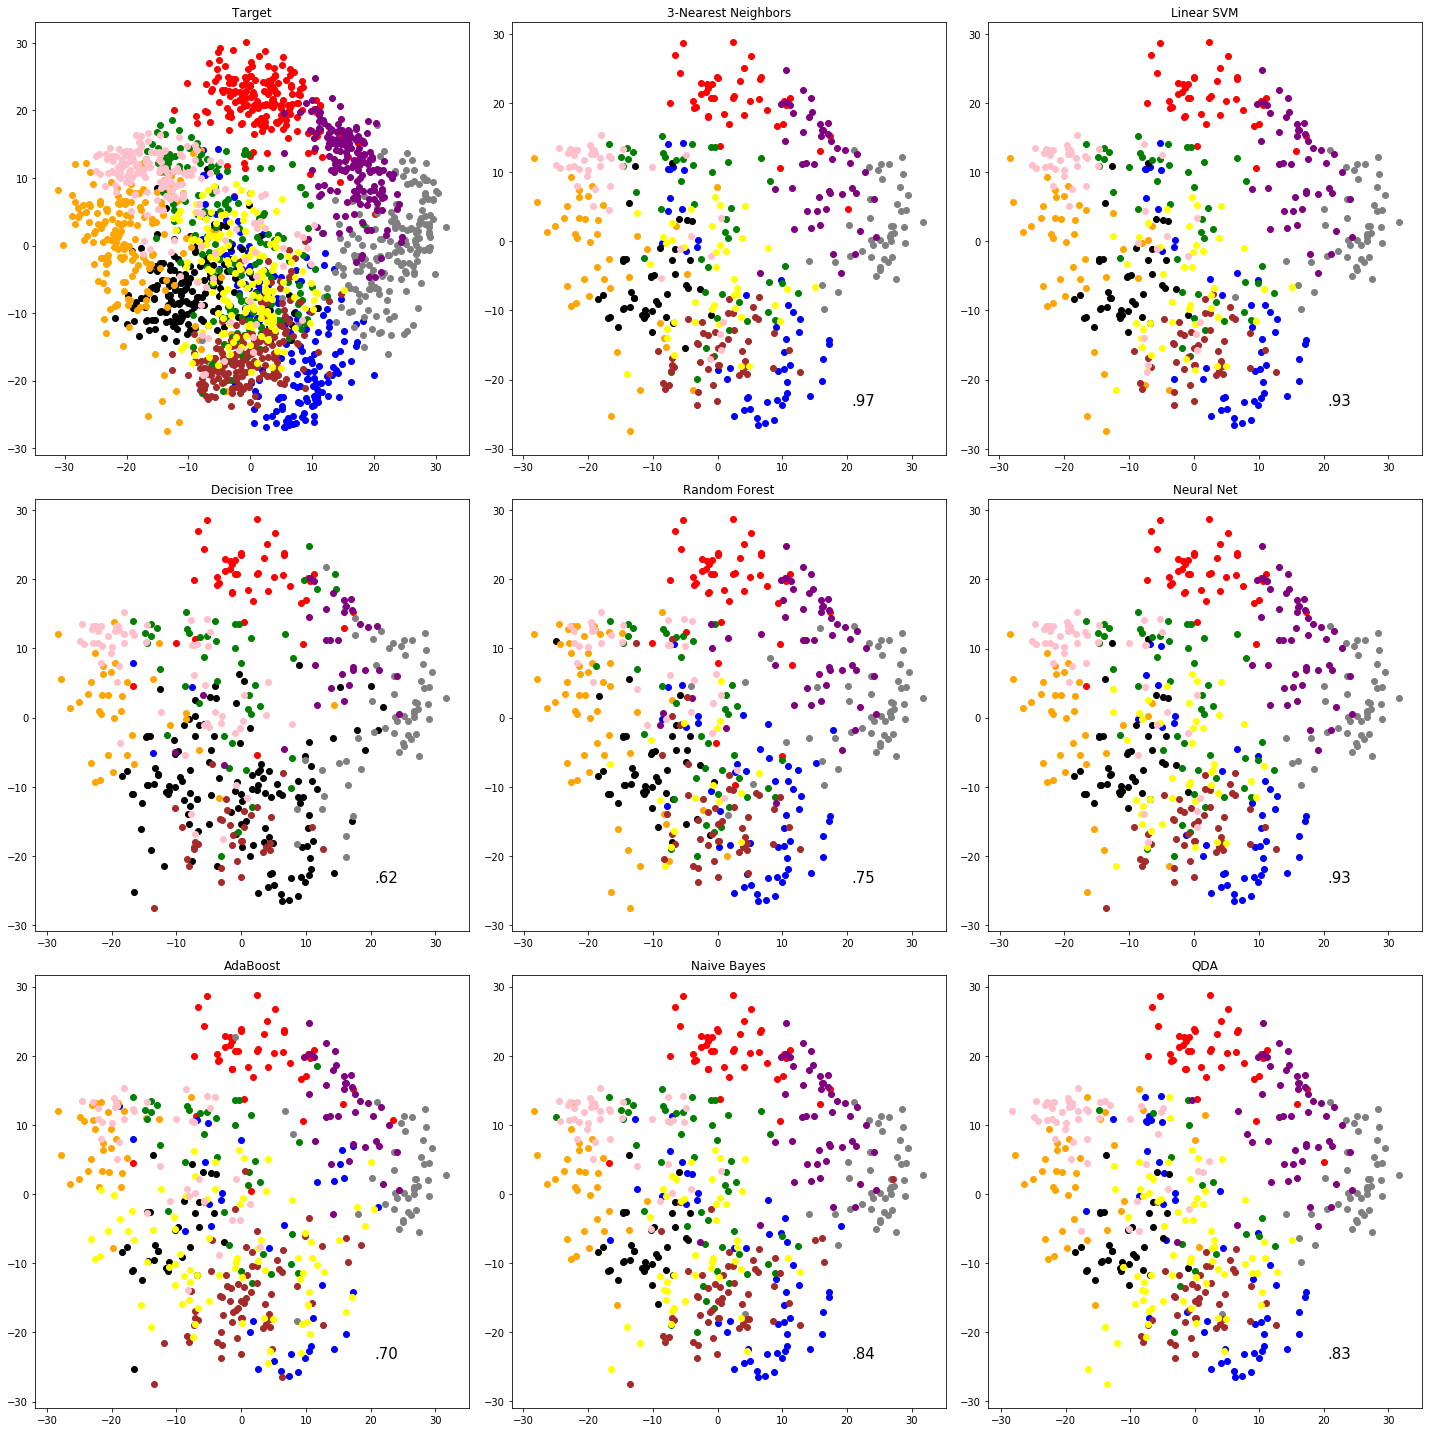

In [13]:
figure = plt.figure(figsize=(20, 20))
ax = plt.subplot(3, 3, 1)

for k in range(K):
    classe = proj[digits.target == k]
    ax.scatter(classe[:,0],classe[:,1],c=couleurs[k])
    ax.set_title('Target')

for i in range(n_clf):
    clf = classifiers[i_clf[i]]
    clf.fit(data_train,y_train)
    ax = plt.subplot(3,3, i+2)
    score = clf.score(data_test, y_test)   # calcule la précision du classifieur clf évalué sur le test set 
                                        # (% de bonne classification)
    Z = clf.predict(data_test)
    ax.text(x_max + 3, y_min - 3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right') 
    ax.set_title(names[i_clf[i]])
    bilan[i] = score
    mat_conf.append(pd.crosstab(y_test, Z, rownames=['Actual Number'], colnames=['Predicted Number']))

    for k in range(K):
        classe = proj[1350:,:][Z == k]
        ax.scatter(classe[:,0],classe[:,1],c=couleurs[k])
plt.tight_layout()
plt.show()

In [9]:
print(bilan)

[ 0.97091723  0.92841163  0.61521253  0.7606264   0.93736018  0.69798658
  0.83668904  0.82774049]


On observe que tous les classifieurs fonctionnent et ont des résultats intéressants pour la classification.
Le plus efficace est celui des 3-NN, utiliser les decision tree est ici moins efficace que les autres algorithmes. Cependant, même 60% de bonnes classifications, avec 10 classes, est bien mieux que le hasard donc apporte quelque chose.

In [10]:
print(mat_conf[7])

Predicted Number   0   1   2   3   4   5   6   7   8   9
Actual Number                                           
0                 43   0   0   0   0   0   0   0   0   0
1                  0  40   0   0   0   0   0   0   5   1
2                  0   4  35   0   0   0   1   0   1   2
3                  0   1   0  29   0   0   0   1  12   2
4                  0   2   0   0  45   0   0   0   1   0
5                  0   0   0   9   0  15   4   0  10   7
6                  0   0   0   0   0   0  47   0   0   0
7                  0   0   0   0   1   1   0  39   3   0
8                  0   2   0   0   0   0   0   0  39   0
9                  0   0   0   0   1   0   0   4   2  38


On peut regarder la matrice de confusion pour chacun des classifieurs. On observe par exemple que le 2 est très peu mal prédit, tandis que le 8 et le 9 sont plus souvent mal classés.

A priori, en ayant seulement observé le graphique des targets, on observait plutôt que le 0, le 3 et le 4 avaient des zones plutôt séparées des autres classes.

Ici, a priori, il n'y a pas de poids plus important accordé à une classe, c'est à dire que prendre un 8 pour un 7 ou que ce soit l'inverse n'a pas d'importance. Ce qui est intéressant à observer est surtout quels sont les chiffres les plus confondus et avec lesquels.

On veut représenter les régions de décisions pour un classifieur:

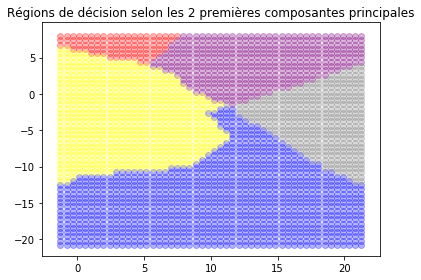

In [11]:
NX = 50
NY = 50

# Construction du grid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, NX), np.linspace(y_min, y_max, NY))
x_grid = np.reshape(xx,(NX*NY,1))
y_grid = np.reshape(yy,(NX*NY,1))
grid = np.hstack((x_grid,y_grid))
grid_inv = pca.inverse_transform(grid)

i=0                          #choix du classifieur
clf = classifiers[i_clf[i]] 
clf.fit(data_train, y_train)
Z = clf.predict(data_test)
classe_grid = clf.predict(grid_inv)
plt.title(names[i_clf[i]])
plt.title('Régions de décision selon les 2 premières composantes principales')

for k in range(K):    
    plt.scatter(grid[classe_grid ==k][:,0],grid[classe_grid ==k][:,1],c=couleurs[k],alpha=0.3)
plt.tight_layout()
plt.show()

On observe qu'on peut déjà bien identifier les frontières de décision entre 5 des classes. Les autres classes se superposent et on ne peut rien voir.

On a pu reprendre presque tous les classifieurs auparavant étudiés et voir qu'ils sont également efficaces pour de la classification multiple !